# Churn Analysis Mattinson

Student: Mike Mattinson

Student ID: 0 0 1 9 8 0 7 6 1

Class: Data Cleaning D206

School: WGU

Date: Cinco de Mayo, 2021

## Getting Started

### Install Anaconda

Download and installed Anaconda. With Anaconda installed, use the Anaconda Prompt available in the program menu. Here is what the menu looks like.

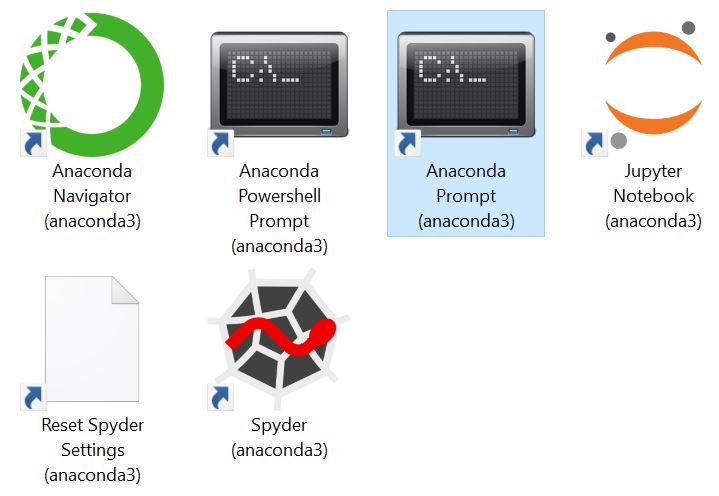

### Upgrade Notebook

<p class="code">pip install notebook --upgrade</p>

### Install Pandas

<p class="code">pip install pandas</p>

### Install Nbextensions

<p class="code">pip install jupyter_contrib_nbextensions</p> 

<p class="code">jupyter contrib nbextension install --user</p>

### Enable ToC2

<p class="code">jupyter nbextension enable ToC2/main</p>

### Config ToC2

Configure the ToC2 Table of Contents. When configured, the Contents of the notebook are displayed on sidebar or as floater. Here is what it looks like.

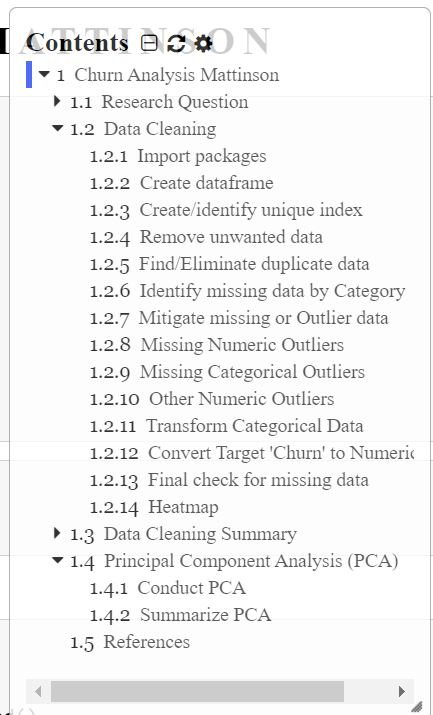

### Notebook Directories

<p class="code">jupyter notebook --generate-config</p>

### Styles

Use custom.css file to style notebook (STO21).  Here is an example from the custom.css file:

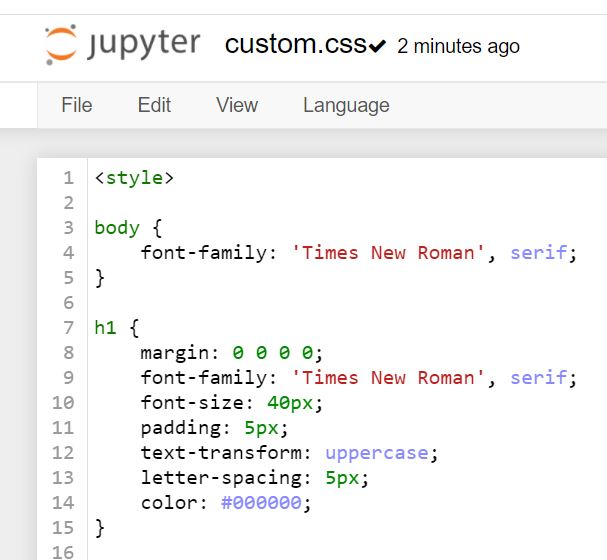

In [6]:
# Styling notebook
from IPython.core.display import HTML
def css_styling(f):
    styles = open("./styles/" + f, "r").read()
    print("Incorporate css styles into notebook (STO21).")
    return HTML(styles)
css_styling('custom.css')

Incorporate css styles into notebook (STO21).


### Create Notebook Folders

Start the Jupyter Notebook from the program menu. Create new folder called 'Churn'. Create subfolder called 'img' to hold image files. Create subfolder called 'styles' to hold the custom css files. Create subfolder called 'tpl' to hold custom template files. Copy assignment data files into the 'Churn' parent folder. Finally, create the new notebook called 'Churn Analysis Mattinson (A)'. Keep iterating the revision of the notebook in ()'s, e.g. (A), then (B), etc. Here is an example of what the assignment folders look like.

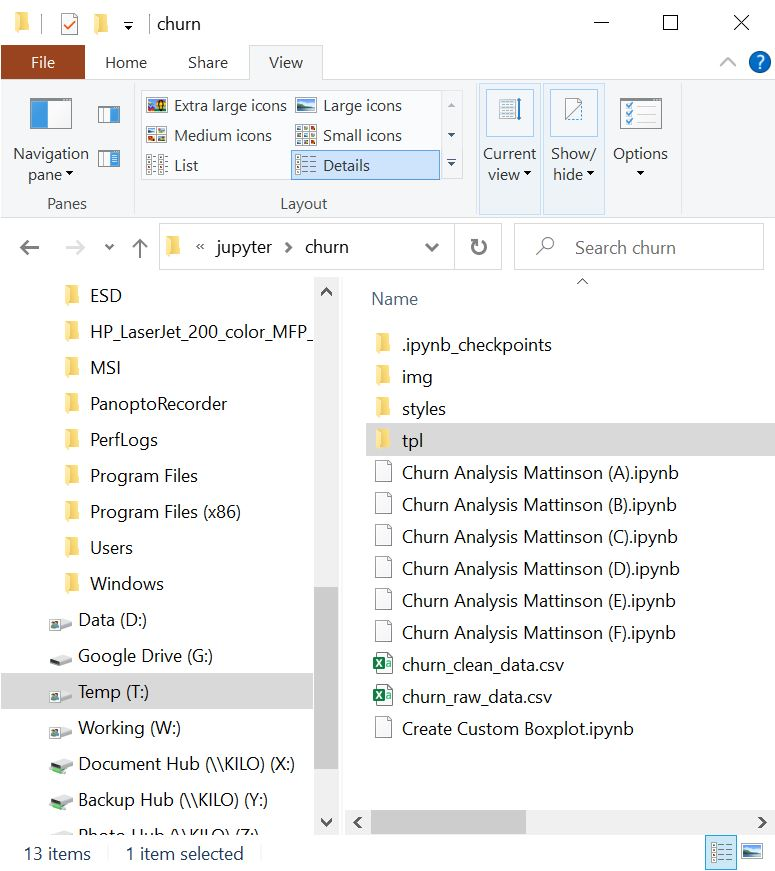

### Define create_box_plot(source,title,height,width) Function

In [7]:
# define a function to create box plot
def create_box_plot(source,title,height,width):
    normal = (source-source.mean())/source.std() # normalized
    fig = plt.figure(figsize =(width,height))
    ax = fig.add_subplot(111)

    # Creating axes instance
    bp = ax.boxplot(normal, patch_artist = True,
                    notch ='True', vert = 0)

    # changing color and linewidth of whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 1.5,
                    linestyle =":")

    # changing color and linewidth of caps
    for cap in bp['caps']:
        cap.set(color ='#8B008B',
                linewidth = 2)

    # changing color and linewidth of medians
    for median in bp['medians']:
        median.set(color ='red',
                   linewidth = 3)

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                  color ='#e7298a',
                  alpha = 0.5)

    ax.set_yticklabels(source.columns) # x-axis labels
    plt.title(title)
    ax.get_xaxis().tick_bottom() # remove bottom ticks
    ax.get_yaxis().tick_left() # remove left ticks   
    plt.show(bp) # display plot

### Define get_outliers(c) Function

In [8]:
# define get_outliers function
def get_outliers(c):
    temp = 'z'+c
    cols = [c,temp,'Churn']
    df[temp] = stats.zscore(df[c])
    df_temp = df[cols].query('abs(' + temp + ') > 3')
    df.drop(columns = temp, inplace=True)
    return(df_temp.sort_values(by=[temp], ascending=False))

## Part I: Research Question

### A. Describe question

Summary from problem's associated dictionary file (WGU21):

<p class="quote">In the telecommunications industry, customers can choose from multiple service providers and actively switch from one provider to another. Customer “churn” is defined as the percentage of customers who stopped using a provider’s product or service during a certain time frame. In this highly competitive market, some telecommunications industries can experience average annual churn rates as high as 25 percent. Given that it costs 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many providers, retaining highly profitable customers is the number one business goal. To reduce customer churn, telecommunications companies need to predict which customers are at high risk of churn. You are an analyst on a team of analysts in a popular telecommunications company, which serves customers in all regions of the United States. You have been asked to clean the raw data set in preparation to explore the data, identify trends, and compare key metrics.</p>

<p>Question: Which factor(s) are most important in predicting churn? In other words, what action(s) can minimize churn and increase profit? Here is a list of some of the possible factors affecting churn:</p>
<ul>
    <li>pay too much...</li>
    <li>pay too much and have problems...</li>
    <li>pay too much and have service interuptions...</li>
    <li>pay too much and have problems and call in to tech support...</li>
    <li>maybe not techie enough to take care of their own problems...</li>
    <li>lower income and pay too much...</li>
    <li>higher income might not care how much they pay...</li>
    <li>pay too much and getting too many marketing emails...</li>
    <li>getting too many marketing emails...</li>
</ul>

### B. Describe variables

#### Import Packages

First thing before going too much further, import all of the packages to be used throughout the notebook.

In [14]:
# import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.stats as stats

#### Setup Dataframe

In [15]:
# use df.info() to list variables, counts and datatypes
df = pd.read_csv('churn_raw_data.csv')
df.info() # show types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

#### Find Missing Data

Looking at the data, you can see the following columns are missing data, there are null values; the non-null count is less than 10,000:

In [16]:
missing = df[df.columns[df.isna().any()]].columns
df_missing = df[missing]
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Children           7505 non-null   float64
 1   Age                7525 non-null   float64
 2   Income             7510 non-null   float64
 3   Techie             7523 non-null   object 
 4   Phone              8974 non-null   object 
 5   TechSupport        9009 non-null   object 
 6   Tenure             9069 non-null   float64
 7   Bandwidth_GB_Year  8979 non-null   float64
dtypes: float64(5), object(3)
memory usage: 625.1+ KB


#### Explore Numerical Data

Also, you can see there are both numeric data and categorical data. Here is the numeric data:

In [17]:
# setup as variable to be used again later
df_num = df.select_dtypes(include='number')
df_num.info() # display types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Zip                   10000 non-null  int64  
 3   Lat                   10000 non-null  float64
 4   Lng                   10000 non-null  float64
 5   Population            10000 non-null  int64  
 6   Children              7505 non-null   float64
 7   Age                   7525 non-null   float64
 8   Income                7510 non-null   float64
 9   Outage_sec_perweek    10000 non-null  float64
 10  Email                 10000 non-null  int64  
 11  Contacts              10000 non-null  int64  
 12  Yearly_equip_failure  10000 non-null  int64  
 13  Tenure                9069 non-null   float64
 14  MonthlyCharge         10000 non-null  float64
 15  Bandwidth_GB_Year   

#### Explore Categorical Data

And, here is the categorical data:

In [18]:
# setup as variable to be used again later
df_cat = df.select_dtypes(include='object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_id       10000 non-null  object
 1   Interaction       10000 non-null  object
 2   City              10000 non-null  object
 3   State             10000 non-null  object
 4   County            10000 non-null  object
 5   Area              10000 non-null  object
 6   Timezone          10000 non-null  object
 7   Job               10000 non-null  object
 8   Education         10000 non-null  object
 9   Employment        10000 non-null  object
 10  Marital           10000 non-null  object
 11  Gender            10000 non-null  object
 12  Churn             10000 non-null  object
 13  Techie            7523 non-null   object
 14  Contract          10000 non-null  object
 15  Port_modem        10000 non-null  object
 16  Tablet            10000 non-null  object
 17  InternetServi

In [19]:
# show categorical columns with null values
df_cat[df_cat.columns[df_cat.isna().any()]].columns

Index(['Techie', 'Phone', 'TechSupport'], dtype='object')

#### Customer Account Data

Purposefully excluding the 'Customer_id' column from any of the following lists. Plan to re-index data using the 'Customer_id' and then these lists wouldn't work if they contain 'Customer_id'.

In [20]:
# setup customer account data
account = [
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Tenure',
    'MonthlyCharge',
    'Bandwidth_GB_Year',
    ]
df[account].iloc[0] # show a record

Contract                            One year
PaperlessBilling                         Yes
PaymentMethod        Credit Card (automatic)
Tenure                               6.79551
MonthlyCharge                         171.45
Bandwidth_GB_Year                    904.536
Name: 0, dtype: object

#### Customer Demographics Data

In [21]:
# setup customer demographics data
demographics = [
    'City',
    'State',
    'County',
    'Zip',
    'Lat',
    'Lng',
    'Population',
    'Area',
    'Timezone',
    'Job',
    'Children',
    'Age',
    'Education',
    'Employment',
    'Income',
    'Marital',
    'Gender',
    ]
df[demographics].info() # show data types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        10000 non-null  object 
 1   State       10000 non-null  object 
 2   County      10000 non-null  object 
 3   Zip         10000 non-null  int64  
 4   Lat         10000 non-null  float64
 5   Lng         10000 non-null  float64
 6   Population  10000 non-null  int64  
 7   Area        10000 non-null  object 
 8   Timezone    10000 non-null  object 
 9   Job         10000 non-null  object 
 10  Children    7505 non-null   float64
 11  Age         7525 non-null   float64
 12  Education   10000 non-null  object 
 13  Employment  10000 non-null  object 
 14  Income      7510 non-null   float64
 15  Marital     10000 non-null  object 
 16  Gender      10000 non-null  object 
dtypes: float64(5), int64(2), object(10)
memory usage: 1.3+ MB


#### Customer Services Data

In [22]:
# setup customer services data list
services = [
    'Phone', 
    'Port_modem',
    'Tablet',
    'InternetService',
    'Multiple',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'OnlineBackup',
    ]
df[services].info() # show data types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Phone             8974 non-null   object
 1   Port_modem        10000 non-null  object
 2   Tablet            10000 non-null  object
 3   InternetService   10000 non-null  object
 4   Multiple          10000 non-null  object
 5   OnlineSecurity    10000 non-null  object
 6   OnlineBackup      10000 non-null  object
 7   DeviceProtection  10000 non-null  object
 8   TechSupport       9009 non-null   object
 9   StreamingTV       10000 non-null  object
 10  StreamingMovies   10000 non-null  object
 11  OnlineBackup      10000 non-null  object
dtypes: object(12)
memory usage: 937.6+ KB


#### Customer Problems

In [23]:
# setup customer problem data
problems = [
    'Contacts', 
    'Outage_sec_perweek',
    'Email',
    'Yearly_equip_failure',
    ]
df[problems].describe() # show descriptive stats

,Contacts,Outage_sec_perweek,Email,Yearly_equip_failure
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.994200,11.452955,12.016000,0.398000
std,0.988466,7.025921,3.025898,0.635953
min,0.000000,-1.348571,1.000000,0.000000
25%,0.000000,8.054362,10.000000,0.000000
50%,1.000000,10.202896,12.000000,0.000000
75%,2.000000,12.487644,14.000000,1.000000
max,7.000000,47.049280,23.000000,6.000000


#### Customer  Survey

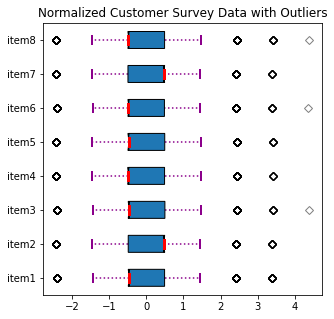

In [24]:
# setup customer survey data
survey = [
    'item1', 
    'item2',
    'item3',
    'item4', 
    'item5',
    'item6',
    'item7',
    'item8',
    ]
df_survey = df[survey]
source = df_survey
title = 'Normalized Customer Survey Data with Outliers'
create_box_plot(source,title,5,5)

## Part II: Data-Cleaning Plan

### C. Explain plan

1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.
2.  Justify your approach for assessing the quality of the data, include: characteristics of the data being assessed, and the approach used to assess the quality.
3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
4.  Provide the code you will use to identify the anomalies in the data.

## Part III: Data Cleaning

### Create dataframe

The datafram 'df' was created in section 2.2.

In [ ]:
# use shape to scope of data
df.shape

The dataframe has been successfully created with 10,000 rows and 52 attributes.

### Unique Index

It looks like the col 'Unnamed: 0' is duplicate with col 'CaseOrder'. I will keep col 'CaseOrder' in case I end up resorting and want to put the data back in its orginal order. It looks like col 'Customer_id' is a good candidate for being a unique row index. I plan on completing the following tasks:
<ol>
    <li>Drop duplicate 'Unnamed: 0' col</li>
    <li>Keep 'CaseOrder' as original sort order</li>
    <li>Set new index using existing 'Customer_id' col</li>
</ol>

In [ ]:
# Drop duplicate col 'Unnamed: 0'
if 'Unnamed: 0' in df.columns:
    df.drop(columns = 'Unnamed: 0', inplace=True)

Because the index we want to use is already in the data, we can use df.set_index() instead of df.reindex()

In [ ]:
# set new index using existing 'Customer_id'
if 'Customer_id' in df.columns:
    df.set_index('Customer_id', inplace=True)
df.index

### Remove Unwanted Data

Looks like col 'Interaction' is related to customer transactions and can be removed for the purpose of this analysis. That will be the only unwanted data removed, keep everything else.

In [ ]:
# Drop unwanted col 'Interaction'
if 'Interaction' in df.columns:
    df.drop(columns = 'Interaction', inplace=True)
df.columns

### Find/Eliminate Duplicate Data

In [ ]:
# look for duplicate data - looking for zero rows
df[df.duplicated()]

In [ ]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

In [ ]:
# check if any rows are duplicated - looing for False
df.duplicated().any()

### Identify Missing Data

In [ ]:
missing = df[df.columns[df.isna().any()]].columns
df_missing = df[missing]
df_missing.info()

### Mitigate Missing Data

NOTE. Don't use df.dropna(). That would remove any row with null values, we would be throwing out too much data. Instead, we will go through each column and find the best method of replacing the data, or if possible, we can leave the data null.

In [ ]:
# fill null values for missing numerical data
df['Children'].fillna(0, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].mean(), inplace=True)
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)

In [ ]:
# fill null values for missing categorical data
df['Techie'].fillna('No', inplace=True)
df['Phone'].fillna('No', inplace=True)
df['TechSupport'].fillna('No', inplace=True)

In [ ]:
# are there any remaining null items - Looking for False
df.isnull().any().any()

Conclusion: No remaining null items. All 10,000 rows contain valid data.

### Visualize Numeric Data

NOTE. The following visualization does not work if there are any null values in the data. So, it is important to complete section 4.6 and 4.7 above before creating this plot.

In [ ]:
# explore numeric data for outliers
source = df.select_dtypes(include='number') # numerical
title = 'Normalized Numeric Data with Outliers'
create_box_plot(source,title,15,6)

### Mitigate Outliers

In [ ]:
# consider outliers...
get_outliers('MonthlyCharge')

### D. Summarize process

1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.
2.  Justify your methods for mitigating each type of discovered anomaly in the data set.
3.  Summarize the outcome from the implementation of each data-cleaning step.
4.  Provide the code used to mitigate anomalies.
5.  Provide a copy of the cleaned data set.
6.  Summarize the limitations of the data-cleaning process.
7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.

In [ ]:
df_cat = df.select_dtypes(include='object')
df_cat.info()

In [ ]:
df['State'].value_counts()

#### Provide copy of cleaned data

In [ ]:
# export clean data to csv file
df.to_csv('churn_clean_data.csv', index = True)

### E. Apply PCA

#### Convert Target to Numeric

In [ ]:
# convert target variable 'Churn' to numeric
df['Churn_num'] = df['Churn'].astype('category').cat.codes
df.info()

#### Create Heatmap

This is an optional step.

In [ ]:
df_heatmap = df[['Population', 'Children','Age','Income','Churn_num',
            'Outage_sec_perweek','Yearly_equip_failure',
            'Tenure','MonthlyCharge','Bandwidth_GB_Year']]
plt.figure(figsize=(30,20))
sns.heatmap(df_heatmap.corr(), annot=True, annot_kws={"size":30})

There is a positive correlation between 'Churn' and 'MonthlyCharge'.

There is a negative correlation between 'Churn' and ['Tenure', 'Bandwidth_GB_Year']

#### Encode categorical data

In [ ]:
# describe this step...
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# encode categorical data columns
df_cat = df.select_dtypes(include='object')
cat_cols = df_cat.columns
print(cat_cols)
for c in cat_cols:
    df[c] = label_encoder.fit_transform(df[c])

#### Create Numeric dataframe

In [ ]:
# create latest data set of numeric cols
df_num = df.select_dtypes(include='number')
df_num

#### Normalize Numeric dataframe

In [ ]:
# drop target variable
if 'Churn_num' in df_num.columns:
    df_num.drop(columns = 'Churn_num', inplace=True)

In [ ]:
# normalize numeric data
df_normal = ( df_num - df_num.mean() ) / df_num.std()
df_normal.round(3)

#### Create Scree Plot

In [ ]:
# create pca scree plot
sns.set(font_scale=1)
pca = PCA(n_components=df_normal.shape[1])
pca.fit(df_normal)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'b+-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#### Display Table of Explained Variance Ratios

In [ ]:
# display list of explained variance
pca.explained_variance_ratio_

#### Calculate Eigenvalues

In [ ]:
# create list of eigenvalues
matrix = np.dot(df_normal.T, df_normal) / df_num.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(matrix, eigenvector)) for eigenvector in pca.components_]

#### Plot Eigenvalues

In [ ]:
# plot eigenvalues
plt.plot(eigenvalues)
plt.xlabel('# components')
plt.ylabel('eigenvalue')
plt.show()

#### Display Table of Component Values

In [ ]:
# display list of component values
values = pd.DataFrame(pca.components_.T, index=df_num.columns)
values.round(3)

## Part IV: Supporting Documents

### F. Provide recording

### G. References

#### Getting Started

https://docs.anaconda.com/anaconda/install/windows/

https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html

https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html#install-the-python-package

https://kegui.medium.com/change-jupyter-notebook-startup-folder-windows-608dfcfdc104

<p class ='apa' id="sto21">(STO21) Stoltenber, S. (2021, April 26). Styling a Jupyter Notebook. Retrieved from <a href="https://skelouse.github.io/styling_a_jupyter_notebook"</a> https://skelouse.github.io/styling_a_jupyter_notebook</p>

#### Research Question

<p class="apa" id="wgu21">(WGU21) WGU.edu (2021, April 26). Data Files and Associated Dictionary Files. Retrieved from <a href="https://access.wgu.edu/ASP3/aap/content/kgj47f8gj49f8du49d3k.html"</a>https://access.wgu.edu/ASP3/aap/content/kgj47f8gj49f8du49d3k.html</p>